In [54]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import  risk_models
from pypfopt import expected_returns
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
from pypfopt import plotting

In [55]:
tickers = ["TSLA", "BIDU", "NVDA", "AAL", "PYPL", "UBER", "DIS", "DHR", "PANW","FWONK","MCL.CN","FI"] 

In [56]:
stock_data = yf.download(tickers, period="10y")

[*********************100%%**********************]  12 of 12 completed


In [57]:
prices = stock_data["Adj Close"].dropna(how="all")
prices.tail()

,AAL,BIDU,DHR,DIS,FI,FWONK,MCL.CN,NVDA,PANW,PYPL,TSLA,UBER
Date,,,,,,,,,,,,
2023-10-30,11.18,106.169998,185.100006,80.680000,112.940002,65.300003,0.065,411.609985,238.550003,51.049999,197.360001,42.730000
2023-10-31,11.15,105.000000,192.020004,81.589996,113.750000,64.690002,0.065,407.799988,243.020004,51.799999,200.839996,43.279999
2023-11-01,11.14,104.970001,190.000000,81.070000,114.930000,64.910004,0.070,423.250000,244.860001,51.660000,205.660004,43.830002
2023-11-02,11.40,107.050003,192.979996,83.290001,117.809998,65.690002,0.075,435.059998,250.360001,55.060001,218.509995,46.480000
2023-11-03,11.98,109.660004,197.869995,85.070000,119.540001,65.230003,0.075,450.049988,243.529999,56.099998,219.960007,47.750000


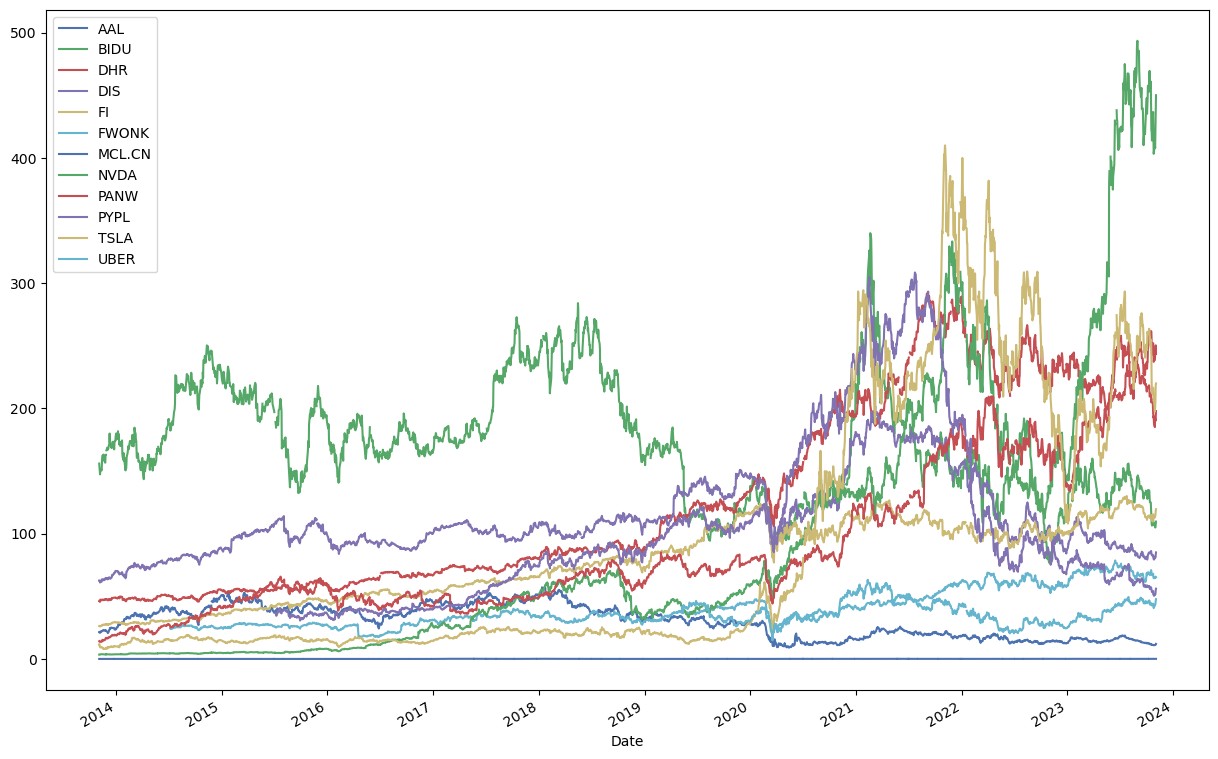

In [58]:
prices[prices.index >= "2013-01-01"].plot(figsize=(15,10));

In [59]:
sample_cov = risk_models.sample_cov(prices, frequency=252)
sample_cov

,AAL,BIDU,DHR,DIS,FI,FWONK,MCL.CN,NVDA,PANW,PYPL,TSLA,UBER
AAL,0.250248,0.057184,0.025736,0.060455,0.043132,0.053320,-0.010156,0.067802,0.047031,0.055507,0.070979,0.137478
BIDU,0.057184,0.195330,0.029885,0.036976,0.034292,0.039852,0.006026,0.074956,0.049486,0.067608,0.082499,0.115464
DHR,0.025736,0.029885,0.051736,0.023388,0.027683,0.025691,0.004973,0.046483,0.031519,0.043095,0.037772,0.049700
DIS,0.060455,0.036976,0.023388,0.072108,0.035238,0.039826,0.005977,0.046527,0.036437,0.048075,0.044768,0.089804
FI,0.043132,0.034292,0.027683,0.035238,0.061512,0.036900,-0.004710,0.047846,0.032033,0.051791,0.043366,0.075397
FWONK,0.053320,0.039852,0.025691,0.039826,0.036900,0.118826,-0.001087,0.054703,0.040166,0.045248,0.051272,0.087253
MCL.CN,-0.010156,0.006026,0.004973,0.005977,-0.004710,-0.001087,3.539416,0.000155,-0.015111,0.005848,0.009665,0.028836
NVDA,0.067802,0.074956,0.046483,0.046527,0.047846,0.054703,0.000155,0.211269,0.071744,0.096061,0.105920,0.137002
PANW,0.047031,0.049486,0.031519,0.036437,0.032033,0.040166,-0.015111,0.071744,0.147388,0.062977,0.075752,0.090734
PYPL,0.055507,0.067608,0.043095,0.048075,0.051791,0.045248,0.005848,0.096061,0.062977,0.146571,0.088984,0.118463


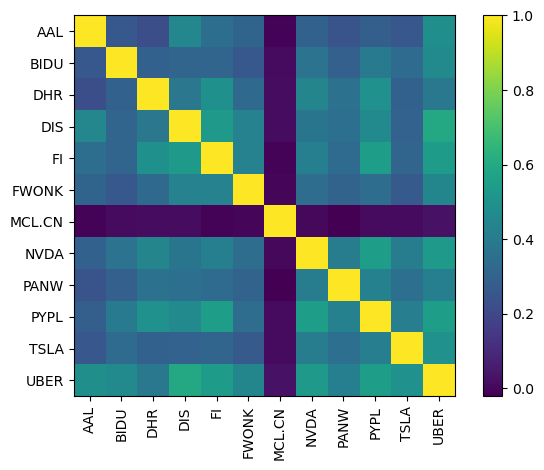

In [60]:
plotting.plot_covariance(sample_cov, plot_correlation=True);

In [61]:
mu = expected_returns.capm_return(prices)
mu

AAL       0.301812
BIDU      0.281631
DHR       0.152706
DIS       0.194729
FI        0.177423
FWONK     0.217250
MCL.CN    1.405053
NVDA      0.336577
PANW      0.244870
PYPL      0.299787
TSLA      0.376827
UBER      0.516025
Name: mkt, dtype: float64

Portfolio Allocation


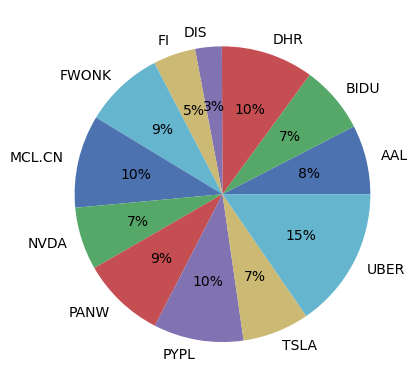

In [62]:
ef = EfficientFrontier(mu,sample_cov)
weights = ef.max_sharpe() #for maximizing the Sharpe ratio #Optimization
cleaned_weights = ef.clean_weights() #to clean the raw weights
# Get the Keys and store them in a list
labels = list(cleaned_weights.keys())
# Get the Values and store them in a list
values = list(cleaned_weights.values())
fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.0f%%')
print('Portfolio Allocation')
plt.show(fig)

In [63]:
cleaned_weights

OrderedDict([('AAL', 0.07578),
             ('BIDU', 0.07375),
             ('DHR', 0.10111),
             ('DIS', 0.02916),
             ('FI', 0.04637),
             ('FWONK', 0.08709),
             ('MCL.CN', 0.10141),
             ('NVDA', 0.06854),
             ('PANW', 0.09123),
             ('PYPL', 0.09844),
             ('TSLA', 0.07304),
             ('UBER', 0.15409)])

In [64]:
latest_prices = prices.iloc[-1]  # prices as of the day you are allocating
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=100000)
alloc, leftover = da.lp_portfolio(verbose=True)
print(f"Discrete allocation performed with ${leftover:.2f} leftover")
alloc

Funds remaining: 280.59
AAL: allocated 0.076, desired 0.076
BIDU: allocated 0.074, desired 0.074
DHR: allocated 0.101, desired 0.101
DIS: allocated 0.029, desired 0.029
FI: allocated 0.047, desired 0.046
FWONK: allocated 0.088, desired 0.087
MCL.CN: allocated 0.102, desired 0.101
NVDA: allocated 0.068, desired 0.069
PANW: allocated 0.090, desired 0.091
PYPL: allocated 0.098, desired 0.098
TSLA: allocated 0.073, desired 0.073
UBER: allocated 0.155, desired 0.154
Allocation has RMSE: 0.000
Discrete allocation performed with $280.59 leftover


C:\Users\DOUGHJ-WS1\anaconda3\Lib\site-packages\cvxpy\problems\problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


{'AAL': 633,
 'BIDU': 67,
 'DHR': 51,
 'DIS': 34,
 'FI': 39,
 'FWONK': 134,
 'MCL.CN': 135219,
 'NVDA': 15,
 'PANW': 37,
 'PYPL': 175,
 'TSLA': 33,
 'UBER': 323}

In [65]:
ef.portfolio_performance(verbose=True);

Expected annual return: 41.6%
Annual volatility: 32.2%
Sharpe Ratio: 1.23
